<a href="https://colab.research.google.com/github/jattFaizan423/Machine-Learning-Project-/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/laptop_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#   **Laptop Company name column**

<Axes: xlabel='Company'>

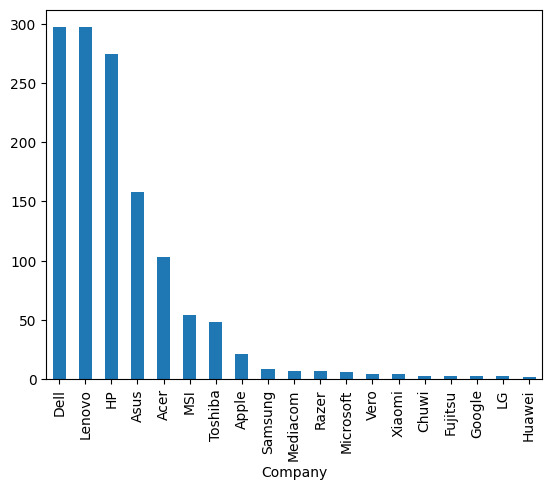

In [ ]:
df['Company'].value_counts().plot(kind='bar')

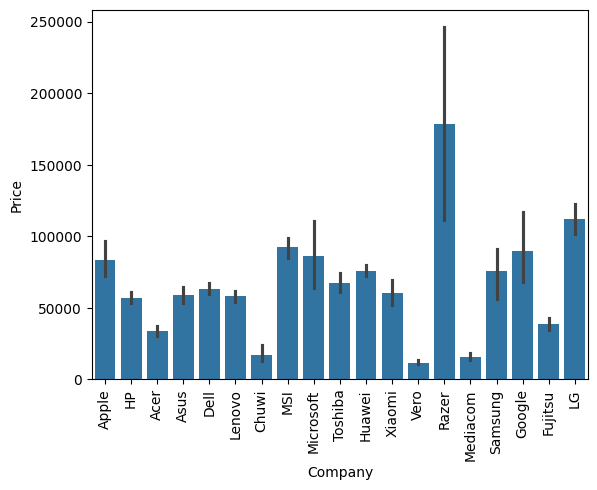

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Company'] = df['Company'].astype('category')

# **Laptop TypeName column**

In [ ]:
df['TypeName'] = df['TypeName'].str.replace('2 in 1 Convertible','Convertible')

<Axes: xlabel='TypeName'>

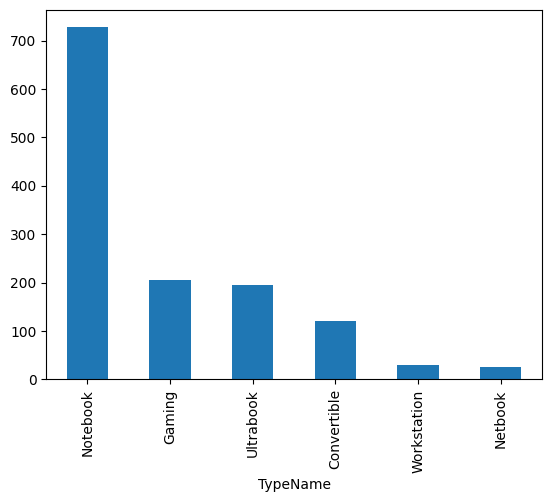

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

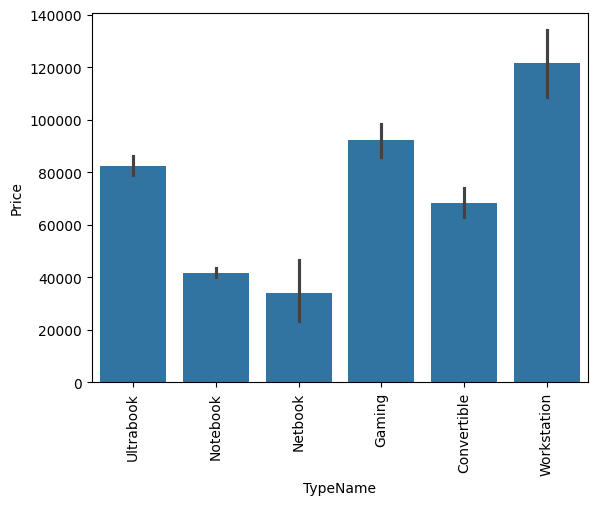

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['TypeName'] = df['TypeName'].astype('category')

# **Touch_screen column**

In [ ]:
Touch_screen = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.insert(3,'Touch_screen',Touch_screen)

<Axes: xlabel='Touch_screen'>

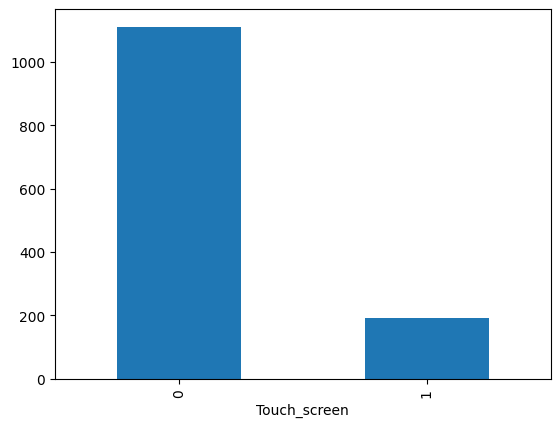

In [ ]:
df['Touch_screen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touch_screen', ylabel='Price'>

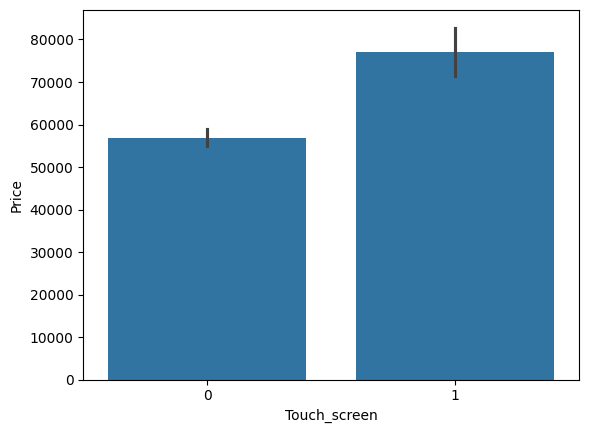

In [ ]:
sns.barplot(x=df['Touch_screen'],y=df['Price'])

In [ ]:
df['Touch_screen'] = df['Touch_screen'].astype('int32')

# **Ips column**

In [ ]:
Ips = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.insert(4,'Ips',Ips)

<Axes: xlabel='Ips'>

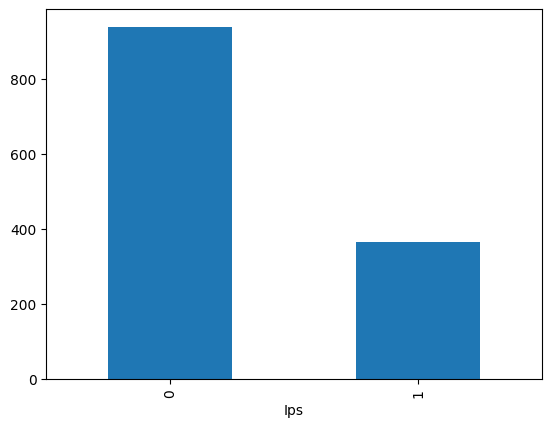

In [ ]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

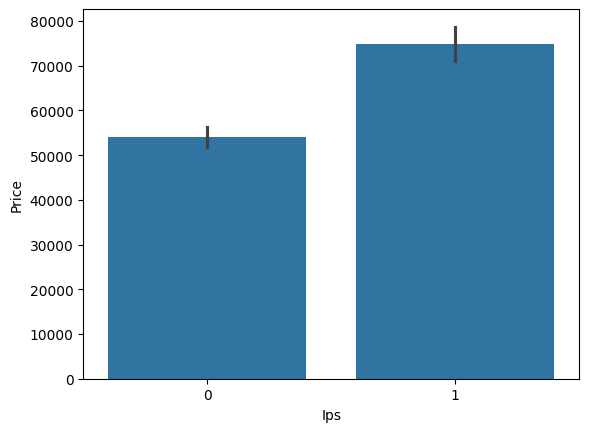

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
df['Ips'] = df['Ips'].astype('int32')

# **PPI column**

In [ ]:
resolution_width = df['ScreenResolution'].str.strip().str.split(' ').str[-1].str.split('x').str[0].astype('int32')

In [ ]:
resolution_height = df['ScreenResolution'].str.strip().str.split(' ').str[-1].str.split('x').str[1].astype('int32')

In [ ]:
PPI = (((resolution_width **2) + (resolution_height **2))**0.5/df['Inches'])
df.insert(5,'PPI',PPI)

In [ ]:
df['PPI'] = df['PPI'].astype(float)

# **Cpu name column**

In [ ]:
Cpu_name = df['Cpu'].str.split().str[:3].str.join(' ')

In [ ]:
df.insert(6,'Cpu_name',Cpu_name)

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu_name'] = df['Cpu_name'].apply(fetch_processor)

In [ ]:
df['Cpu_name'] = df['Cpu_name'].astype('category')

<Axes: xlabel='Cpu_name'>

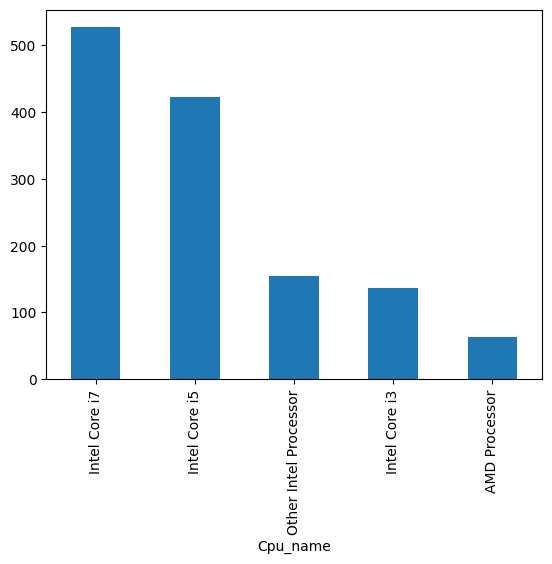

In [ ]:
df['Cpu_name'].value_counts().plot(kind='bar')

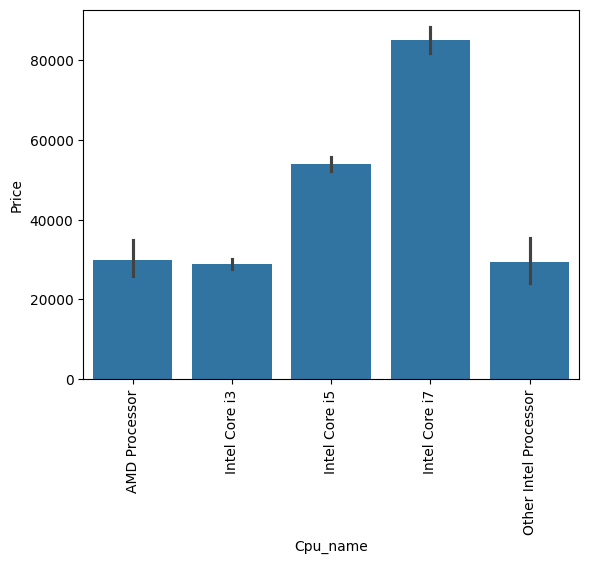

In [ ]:
sns.barplot(x=df['Cpu_name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# **Ram column**

In [ ]:
df['Ram'] = df['Ram'].str.replace('6GB','4GB')
df['Ram'] = df['Ram'].str.replace('14GB','12GB')

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','', regex=False).astype('int32')


<Axes: xlabel='Ram'>

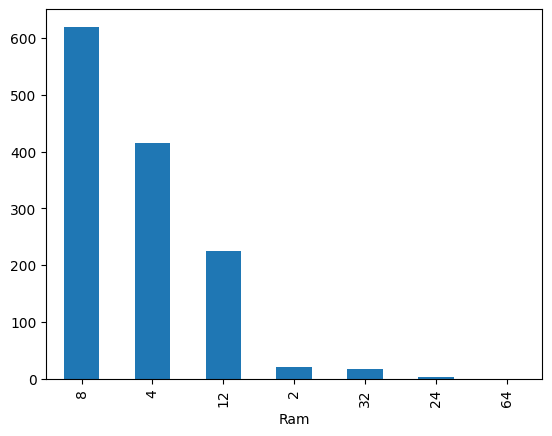

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

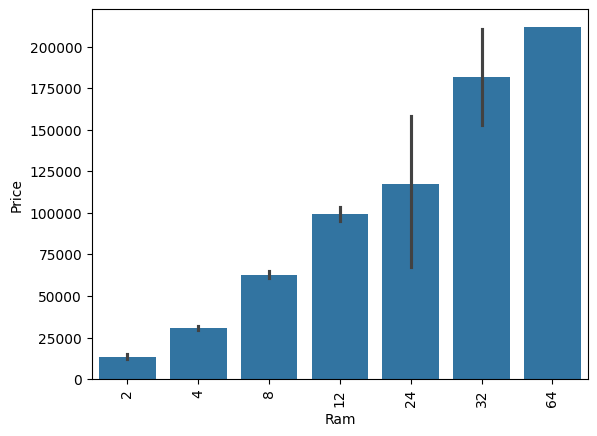

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Ram'] = df['Ram'].astype('int32')

# **Rom column**

In [ ]:
Rom = df['Memory'].str.split().str[0]

In [ ]:
df.insert(10,'Rom',Rom)

In [ ]:
df['Rom'] = df['Rom'].str.replace('500GB','512GB')
df['Rom'] = df['Rom'].str.replace('508GB','512GB')
df['Rom'] = df['Rom'].str.replace('240GB','256GB')
df['Rom'] = df['Rom'].str.replace('180GB','256GB')

In [ ]:
df['Rom'] = df['Rom'].str.extract('(\d+\.?\d*)')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3911359200.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Rom'] = df['Rom'].str.extract('(\d+\.?\d*)')


In [ ]:
def convert_tb_to_gb(x):
    """
    Convert 1TB → 1024GB and 2TB → 2048GB.
    Leave other numbers unchanged.
    """
    if x in ['1', '1.0']:
        return '1024'
    elif x in '2':
        return '2048'
    else:
        return x

# Apply the function
df['Rom'] = df['Rom'].apply(convert_tb_to_gb)


<Axes: xlabel='Rom'>

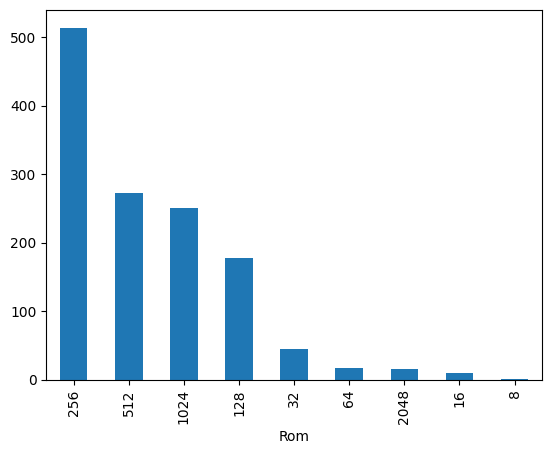

In [ ]:
df['Rom'].value_counts().plot(kind='bar')

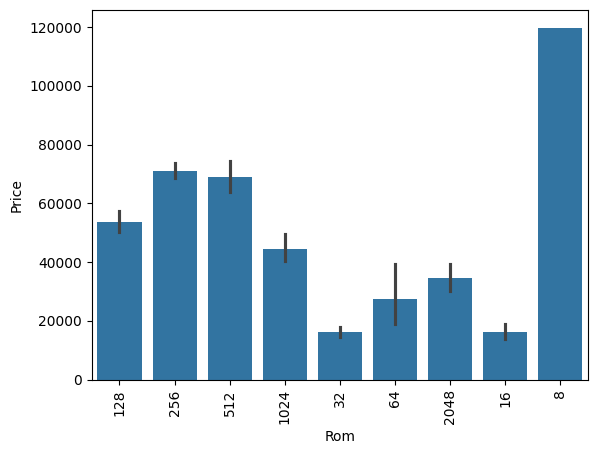

In [ ]:
sns.barplot(x=df['Rom'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Rom'] = df['Rom'].astype('int32')

# **Gpu brand column**

In [ ]:
Gpu_brand = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.insert(12,'Gpu_brand',Gpu_brand)

In [ ]:
df['Gpu_brand'] = df['Gpu_brand'].str.replace('ARM','AMD')

<Axes: xlabel='Gpu_brand'>

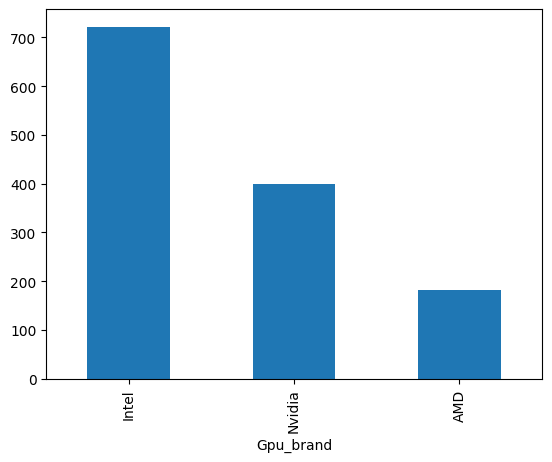

In [ ]:
df['Gpu_brand'].value_counts().plot(kind='bar')

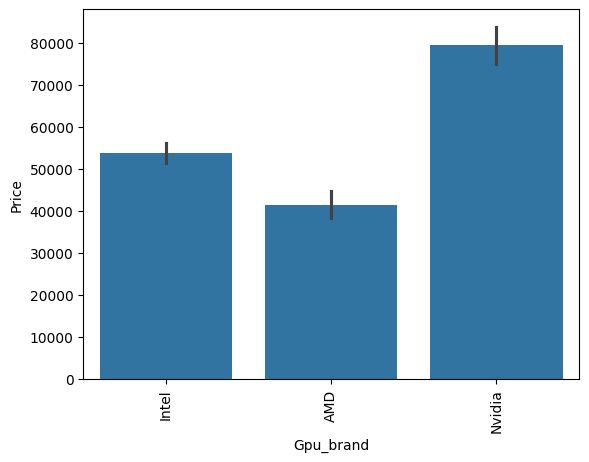

In [ ]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Gpu_brand'] = df['Gpu_brand'].astype('category')

# **Operating system**

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['OpSys'] = df['OpSys'].apply(cat_os)

<Axes: xlabel='OpSys'>

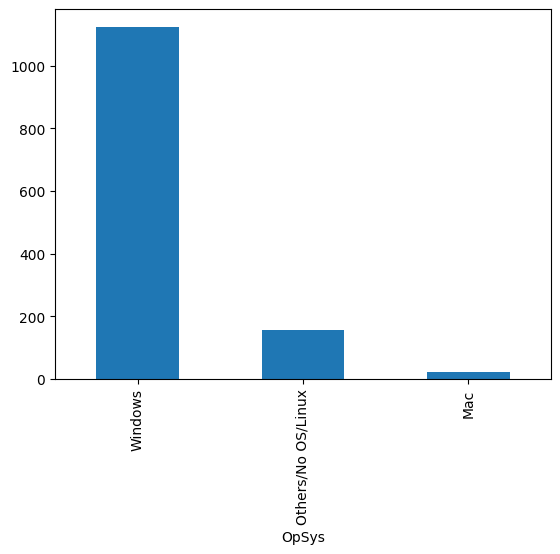

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

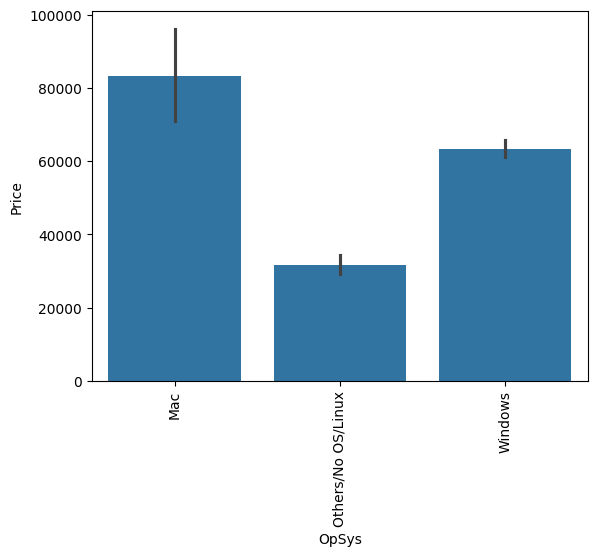

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['OpSys'] = df['OpSys'].astype('category')

# **Weight column**

In [ ]:
df['Weight'] = df['Weight'].str.replace('kg','',regex=False)

/tmp/ipython-input-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

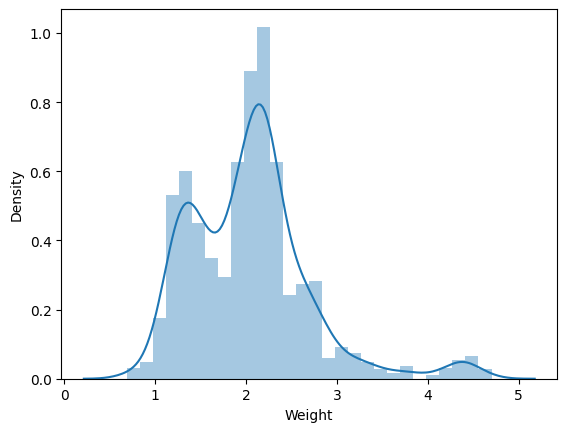

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

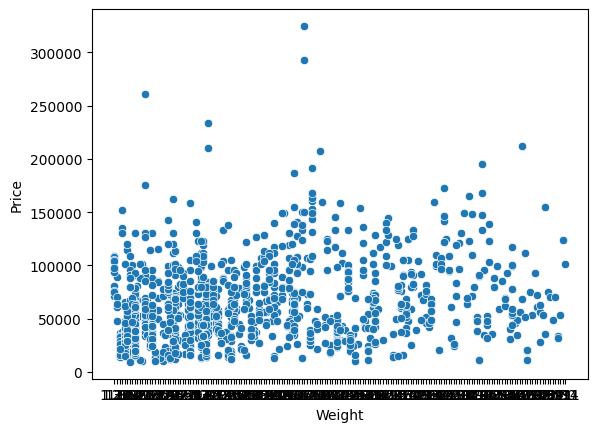

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df['Weight'] = df['Weight'].astype(float)

# **Price column**

/tmp/ipython-input-3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

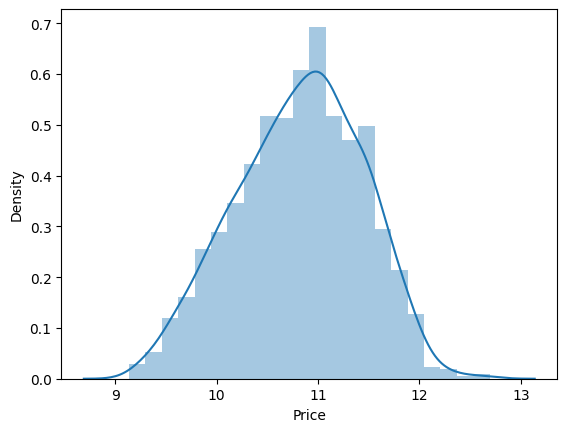

In [ ]:
sns.distplot(np.log(df['Price']))

In [ ]:
df.drop(columns=['Inches','ScreenResolution','Cpu','Memory','Gpu'],inplace=True)

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()['Price']
print(correlation)

Touch_screen    0.191226
Ips             0.252208
PPI             0.473487
Ram             0.714813
Rom            -0.127656
Weight          0.210370
Price           1.000000
Name: Price, dtype: float64


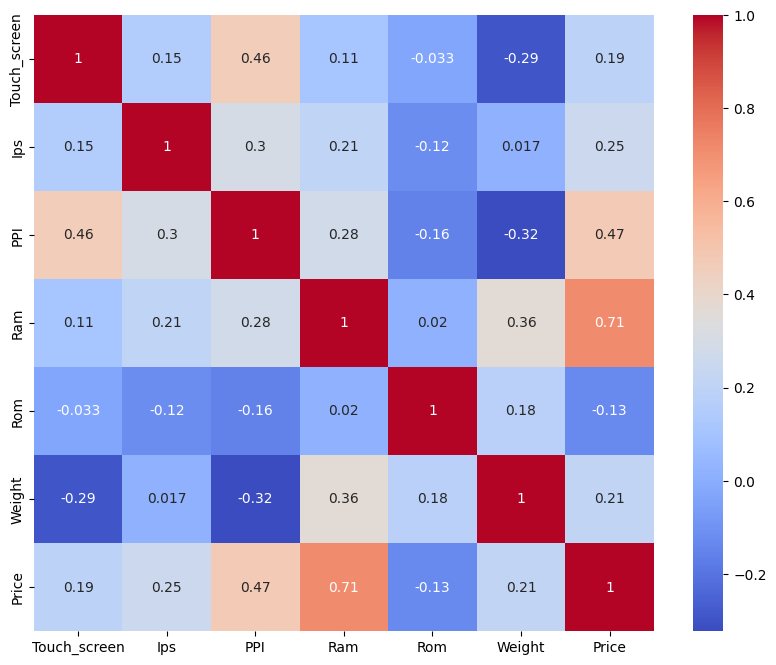

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# **Train test spliting**

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['Company','TypeName','Cpu_name','Gpu_brand','OpSys'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8900442611511503
MAE 0.1580556916145795


In [ ]:
df.head(5)

,Company,TypeName,Touch_screen,Ips,PPI,Cpu_name,Ram,Rom,Gpu_brand,OpSys,Weight,Price
0,Apple,Ultrabook,0,1,226.983005,Intel Core i5,8,128,Intel,Mac,1.37,71378.6832
1,Apple,Ultrabook,0,0,127.677940,Intel Core i5,8,128,Intel,Mac,1.34,47895.5232
2,HP,Notebook,0,0,141.211998,Intel Core i5,8,256,Intel,Others/No OS/Linux,1.86,30636.0000
3,Apple,Ultrabook,0,1,220.534624,Intel Core i7,12,512,AMD,Mac,1.83,135195.3360
4,Apple,Ultrabook,0,1,226.983005,Intel Core i5,8,256,Intel,Mac,1.37,96095.8080


In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))